In [11]:
import pandas as pd
import numpy as np
import pandas_flavor as pfl
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#setting display options 

pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)

In [47]:
zillow_regiondf = zillow_df[['RegionID', 'RegionName', 'City', 
                             'State','Metro', 'CountyName']]
zillow_regiondf.to_csv('../write_data/regions_zipcode.csv')
zillow_regiondf.head()

,RegionID,RegionName,City,State,Metro,CountyName
0,84654,60657,Chicago,IL,Chicago,Cook
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin
2,91982,77494,Katy,TX,Houston,Harris
3,84616,60614,Chicago,IL,Chicago,Cook
4,93144,79936,El Paso,TX,El Paso,El Paso


In [5]:
#transposing zillow dataframe 
zillow_transpose_df = zillow_df.T

#changing the name of columns to RegionName or zipcodes
zillow_transpose_df.columns = zillow_transpose_df.iloc[1].tolist()

#cutting out rows not necessary for our data
zillow_cleandf = zillow_transpose_df.iloc[7:]

#converting index to datetimeindex
zillow_cleandf.index = pd.to_datetime(zillow_cleandf.index, format = '%Y-%m')

#changing name of index
zillow_cleandf.index.name = 'Date_index'

#casting all columns to numeric
zillow_cleandf = zillow_cleandf.apply(pd.to_numeric)

#saving dataframe as csv
zillow_cleandf.to_csv('../write_data/zipcodes_all_price.csv')

In [6]:
zillow_cleandf.head(2)

,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,11226,32162,11375,11235,37013,90250,60647,37211,78660,60618,10011,10128,77573,77584,28269,79912,78572,94565,30349,20002,90046,78130,78613,20009,75052,10462,10456,37042,77429,63376,60613,77479,30044,73099,77036,77433,10463,11230,60629,11209,60625,30043,75034,11212,75287,28277,85032,7030,11214,21234,33160,78521,23464,77077,94501,30096,78704,98052,77379,75243,11221,78245,11229,8701,60619,90034,94110,78666,30024,60610,44107,75067,33025,33411,33139,11377,90044,48197,2169,23462,90805,66062,44035,95630,90650,11234,92683,85710,78745,11355,10314,30281,32210,37075,94558,60611,11215,90026,85225,91910,87111,28027,6010,78240,87114,89108,85308,11211,17603,93722,80134,48180,85281,78577,94533,15601,95608,43081,44060,80013,33024,20906,33009,90066,43123,97229,76028,91709,11385,85364,11373,14850,65807,98012,77459,92677,95823,33908,44256,2148,60620,27410,45011,76063,33647,92804,11238,60634,8753,65203,47906,98103,92345,75228,92126,90019,43130,27406,60016,46307,76244,28314,27610,89121,29732,75056,30040,30188,79938,92336,99301,20011,77095,91911,77845,92503,94536,7002,27587,21740,11233,7302,90280,22191,19111,89117,87120,43230,40475,46227,11236,91730,23320,74012,90201,92592,32244,21117,92109,34787,77450,92101,32822,30080,7093,60626,90004,28078,34135,90706,48103,30062,33186,30052,30041,75217,33012,30331,11372,32256,34711,60649,27834,92335,37130,23454,38401,92021,48185,93065,91342,44130,95747,32218,95123,43026,20019,22193,45840,80634,...,14804,44093,1011,6027,50233,62218,84328,56382,67001,67428,3084,3230,13026,42436,45889,46985,58059,22713,46165,79355,48761,61747,3777,18915,55924,3583,47948,12726,23433,54921,31829,98645,45881,62048,61841,43540,57018,49318,8006,1092,11958,55324,55722,62338,31097,43432,68523,2812,37688,80827,97886,56569,12959,37118,48760,67437,12513,10518,12423,14008,44449,13807,11739,21645,8328,24325,59846,1245,3846,56570,72845,13028,61870,3816,1008,58042,38560,66956,6796,53911,45339,3745,21521,46764,62545,33855,13334,61912,13061,61230,15015,46913,96141,3854,10964,14728,43456,61038,14506,47541,19964,62539,24530,38362,62440,98358,3268,80819,99123,92339,1366,62094,67070,3450,37141,54007,20609,65046,12836,61847,23039,1026,24059,3241,38361,56181,79366,33924,49102,50530,95629,60512,61420,93664,3590,83803,61859,92333,55753,37369,50162,20693,61931,49322,49724,66023,98351,10501,16836,31561,43013,56041,1368,53550,46987,56176,56314,61488,95636,8317,57035,12824,21662,3853,3605,43445,50106,61733,94970,21671,49638,87540,12175,49716,8241,3740,3875,21869,56010,17006,21657,6090,52728,55065,25843,20674,97011,68633,98279,56578,12153,61572,15083,93529,52341,49725,56120,98940,45326,91008,4066,84726,80515,98925,49718,43525,80428,96148,28611,83846,93517,28775,80456,1255,85611,3457,3284,95728,28757,95497,12156,97149,77457,80481,20625,20618,80510,49710,1270,12480,83821,29915,49768,3215,28039,97733,92322,3812,89413,92341,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-04-01,334200.0,235700.0,210400.0,498100.0,77300.0,95000.0,152900.0,216500.0,95400.0,766000.0,162000.0,101000.0,252400.0,190500.0,112400.0,152500.0,122700.0,97900.0,138900.0,142600.0,NaN,3676700.0,141400.0,138500.0,126100.0,119700.0,69900.0,139200.0,90900.0,94300.0,340600.0,123900.0,169600.0,178800.0,100800.0,154300.0,NaN,72000.0,149600.0,98200.0,297900.0,189800.0,111400.0,83100.0,120400.0,147300.0,180100.0,230100.0,93400.0,255700.0,148900.0,135200.0,285200.0,125000.0,184400.0,183900.0,95400.0,301600.0,191000.0,99000.0,3373

* **Our data is monthly and resampling the data yearly will show us the average change in housing prices**

In [7]:
#resampling yearly average data
zillow_yr_df = zillow_cleandf.resample('YS').mean()
zillow_yr_df.head(3)

,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,11226,32162,11375,11235,37013,90250,60647,37211,78660,60618,10011,10128,77573,77584,28269,79912,78572,94565,30349,20002,90046,78130,78613,20009,75052,10462,10456,37042,77429,63376,60613,77479,30044,73099,77036,77433,10463,11230,60629,11209,60625,30043,75034,11212,75287,28277,85032,7030,11214,21234,33160,78521,23464,77077,94501,30096,78704,98052,77379,75243,11221,78245,11229,8701,60619,90034,94110,78666,30024,60610,44107,75067,33025,33411,33139,11377,90044,48197,2169,23462,90805,66062,44035,95630,90650,11234,92683,85710,78745,11355,10314,30281,32210,37075,94558,60611,11215,90026,85225,91910,87111,28027,6010,78240,87114,89108,85308,11211,17603,93722,80134,48180,85281,78577,94533,15601,95608,43081,44060,80013,33024,20906,33009,90066,43123,97229,76028,91709,11385,85364,11373,14850,65807,98012,77459,92677,95823,33908,44256,2148,60620,27410,45011,76063,33647,92804,11238,60634,8753,65203,47906,98103,92345,75228,92126,90019,43130,27406,60016,46307,76244,28314,27610,89121,29732,75056,30040,30188,79938,92336,99301,20011,77095,91911,77845,92503,94536,7002,27587,21740,11233,7302,90280,22191,19111,89117,87120,43230,40475,46227,11236,91730,23320,74012,90201,92592,32244,21117,92109,34787,77450,92101,32822,30080,7093,60626,90004,28078,34135,90706,48103,30062,33186,30052,30041,75217,33012,30331,11372,32256,34711,60649,27834,92335,37130,23454,38401,92021,48185,93065,91342,44130,95747,32218,95123,43026,20019,22193,45840,80634,...,14804,44093,1011,6027,50233,62218,84328,56382,67001,67428,3084,3230,13026,42436,45889,46985,58059,22713,46165,79355,48761,61747,3777,18915,55924,3583,47948,12726,23433,54921,31829,98645,45881,62048,61841,43540,57018,49318,8006,1092,11958,55324,55722,62338,31097,43432,68523,2812,37688,80827,97886,56569,12959,37118,48760,67437,12513,10518,12423,14008,44449,13807,11739,21645,8328,24325,59846,1245,3846,56570,72845,13028,61870,3816,1008,58042,38560,66956,6796,53911,45339,3745,21521,46764,62545,33855,13334,61912,13061,61230,15015,46913,96141,3854,10964,14728,43456,61038,14506,47541,19964,62539,24530,38362,62440,98358,3268,80819,99123,92339,1366,62094,67070,3450,37141,54007,20609,65046,12836,61847,23039,1026,24059,3241,38361,56181,79366,33924,49102,50530,95629,60512,61420,93664,3590,83803,61859,92333,55753,37369,50162,20693,61931,49322,49724,66023,98351,10501,16836,31561,43013,56041,1368,53550,46987,56176,56314,61488,95636,8317,57035,12824,21662,3853,3605,43445,50106,61733,94970,21671,49638,87540,12175,49716,8241,3740,3875,21869,56010,17006,21657,6090,52728,55065,25843,20674,97011,68633,98279,56578,12153,61572,15083,93529,52341,49725,56120,98940,45326,91008,4066,84726,80515,98925,49718,43525,80428,96148,28611,83846,93517,28775,80456,1255,85611,3457,3284,95728,28757,95497,12156,97149,77457,80481,20625,20618,80510,49710,1270,12480,83821,29915,49768,3215,28039,97733,92322,3812,89413,92341,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-01-01,338444.444444,230988.888889,206655.555556,503444.444444,77455.555556,95733.333333,152211.111111,217266.666667,96255.555556,7.883444e+05,163833.333333,99800.000000,251422.222222,192633.333333,114000.000000,152644.444444,122033.333333,98888.888889,138988.888889,141988.888889,NaN,3.791967e+06,140822.222222,140955.555556,127877.777778,119966.666667,68888.888889,135711.111111,91255.555556,93711.111111,347055.555556,123900.000000,169522.222222,180466.666667,101333.333333,154455.555556,NaN,75222.222222,147344.444444,100588.

In [8]:
#average profit margin trend
zillow_yr_trend = zillow_yr_df.pct_change().dropna().diff()
zillow_yr_trend.head(2)

,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,11226,32162,11375,11235,37013,90250,60647,37211,78660,60618,10011,10128,77573,77584,28269,79912,78572,94565,30349,20002,90046,78130,78613,20009,75052,10462,10456,37042,77429,63376,60613,77479,30044,73099,77036,77433,10463,11230,60629,11209,60625,30043,75034,11212,75287,28277,85032,7030,11214,21234,33160,78521,23464,77077,94501,30096,78704,98052,77379,75243,11221,78245,11229,8701,60619,90034,94110,78666,30024,60610,44107,75067,33025,33411,33139,11377,90044,48197,2169,23462,90805,66062,44035,95630,90650,11234,92683,85710,78745,11355,10314,30281,32210,37075,94558,60611,11215,90026,85225,91910,87111,28027,6010,78240,87114,89108,85308,11211,17603,93722,80134,48180,85281,78577,94533,15601,95608,43081,44060,80013,33024,20906,33009,90066,43123,97229,76028,91709,11385,85364,11373,14850,65807,98012,77459,92677,95823,33908,44256,2148,60620,27410,45011,76063,33647,92804,11238,60634,8753,65203,47906,98103,92345,75228,92126,90019,43130,27406,60016,46307,76244,28314,27610,89121,29732,75056,30040,30188,79938,92336,99301,20011,77095,91911,77845,92503,94536,7002,27587,21740,11233,7302,90280,22191,19111,89117,87120,43230,40475,46227,11236,91730,23320,74012,90201,92592,32244,21117,92109,34787,77450,92101,32822,30080,7093,60626,90004,28078,34135,90706,48103,30062,33186,30052,30041,75217,33012,30331,11372,32256,34711,60649,27834,92335,37130,23454,38401,92021,48185,93065,91342,44130,95747,32218,95123,43026,20019,22193,45840,80634,...,14804,44093,1011,6027,50233,62218,84328,56382,67001,67428,3084,3230,13026,42436,45889,46985,58059,22713,46165,79355,48761,61747,3777,18915,55924,3583,47948,12726,23433,54921,31829,98645,45881,62048,61841,43540,57018,49318,8006,1092,11958,55324,55722,62338,31097,43432,68523,2812,37688,80827,97886,56569,12959,37118,48760,67437,12513,10518,12423,14008,44449,13807,11739,21645,8328,24325,59846,1245,3846,56570,72845,13028,61870,3816,1008,58042,38560,66956,6796,53911,45339,3745,21521,46764,62545,33855,13334,61912,13061,61230,15015,46913,96141,3854,10964,14728,43456,61038,14506,47541,19964,62539,24530,38362,62440,98358,3268,80819,99123,92339,1366,62094,67070,3450,37141,54007,20609,65046,12836,61847,23039,1026,24059,3241,38361,56181,79366,33924,49102,50530,95629,60512,61420,93664,3590,83803,61859,92333,55753,37369,50162,20693,61931,49322,49724,66023,98351,10501,16836,31561,43013,56041,1368,53550,46987,56176,56314,61488,95636,8317,57035,12824,21662,3853,3605,43445,50106,61733,94970,21671,49638,87540,12175,49716,8241,3740,3875,21869,56010,17006,21657,6090,52728,55065,25843,20674,97011,68633,98279,56578,12153,61572,15083,93529,52341,49725,56120,98940,45326,91008,4066,84726,80515,98925,49718,43525,80428,96148,28611,83846,93517,28775,80456,1255,85611,3457,3284,95728,28757,95497,12156,97149,77457,80481,20625,20618,80510,49710,1270,12480,83821,29915,49768,3215,28039,97733,92322,3812,89413,92341,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

* **Filter out the zipcodes in descending orders of average ROI trend**

In [9]:
#the zipcodes with the highest trending average return values
trending_zipcodes = zillow_yr_trend.mean().sort_values(ascending=False)

trending_zipcodes

7106     0.116292
29661    0.112677
64110    0.110596
20621    0.104965
7103     0.098067
           ...   
71238   -0.096368
10128   -0.097391
11222   -0.100235
16625   -0.101610
70090   -0.105950
Length: 14723, dtype: float64

In [10]:
#making a list of top, bottom  and random 100 zipcodes interms of average ROI trend
top_100_zipcodes = trending_zipcodes.index[:100].tolist()
bottom_100_zipcodes = trending_zipcodes.index[-100:].tolist()
random_100_zipcodes = np.random.choice(zillow_cleandf.columns, 100)

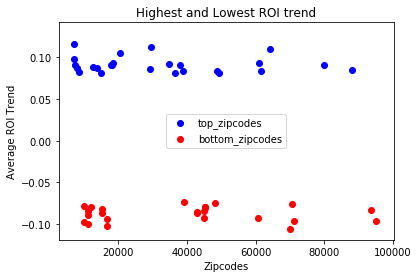

In [11]:
#plotting the average ROI trend for top five and bottom five zipcodes 

plt.scatter(trending_zipcodes.index[:25], 
            trending_zipcodes.iloc[:25], color = 'blue', label='top_zipcodes')

plt.scatter(trending_zipcodes.index[-25:], 
            trending_zipcodes.iloc[-25:], color = 'red', label='bottom_zipcodes')

plt.xlabel('Zipcodes')
plt.ylabel('Average ROI Trend')
plt.legend(loc='center')
plt.title('Highest and Lowest ROI trend')
plt.show()
###figure out annotation

In [12]:
from criteria_housing import dataframe_aggregator

In [13]:
#Dataframes for monthly housing price of top 25, bottom 25 and randomly picked zipcodes
top_monthly_df = dataframe_aggregator(zillow_cleandf, top_100_zipcodes)
bottom_monthly_df = dataframe_aggregator(zillow_cleandf, bottom_100_zipcodes)
random_monthly_df = dataframe_aggregator(zillow_cleandf, random_100_zipcodes)

In [22]:
top_monthly_df.columns 

Int64Index([ 7106, 29661, 64110, 20621,  7103, 18346, 60954, 34785, 18224,
            17931, 38127,  7416, 79901, 12542,  8110, 13797, 29372, 88030,
            48884, 38862, 61728,  8618, 36611, 15034, 49309, 98550, 18505,
            39530, 48503, 44314, 78560, 76534, 32134,  7305,  7088, 48888,
             7201,  7050, 29805,  8302, 35006, 72732, 32764, 37411, 19023,
            73759,  7422, 49950, 29405, 40210, 44301,  8030, 18334, 14843,
            15083, 60034, 20618, 73111, 30288, 60901, 47469, 33513, 19601,
             7060, 62544, 16401, 19134, 18102, 65049, 10986, 46562, 16433,
            46982, 47396, 47303, 68730, 41014, 32187, 44102, 18321, 47383,
            49064,  8733, 16041, 61491, 43013,  8046, 32640, 72103, 21229,
             8270, 18651, 65723, 14572,  7002, 14809, 18355, 12528, 28786,
            14062],
           dtype='int64')

In [14]:
#save the dataframes as csv
top_monthly_df.to_csv('../write_data/top_monthly.csv')
bottom_monthly_df.to_csv('../write_data/bottom_monthly.csv')
random_monthly_df.to_csv('../write_data/random_monthly.csv')

In [15]:
from criteria_housing import name_zipcode_area

In [16]:
#region names for the top 100 zipcodes
name_zipcode_area(zillow_regiondf, top_100_zipcodes).head()

,RegionID,RegionName,City,State,Metro,CountyName
4211,60610,7106,Newark,NJ,New York,Essex
10069,70641,29661,Marietta,SC,Greenville,Greenville
6216,86349,64110,Kansas City,MO,Kansas City,Jackson
14244,66512,20621,Chaptico,MD,California-Lexington Park,Saint Marys
3540,60607,7103,Newark,NJ,New York,Essex


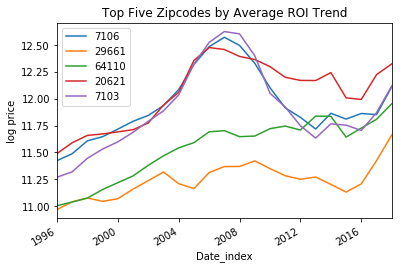

In [17]:
#dataframe for top 5 zipcodes
topfive_yr_df = dataframe_aggregator(zillow_yr_df, top_100_zipcodes[:5])
np.log(topfive_yr_df).plot()
plt.ylabel('log price')
plt.title('Top Five Zipcodes by Average ROI Trend')
plt.show()

In [18]:
#region names for the bottom five zipcodes
name_zipcode_area(zillow_regiondf, bottom_100_zipcodes).head()

,RegionID,RegionName,City,State,Metro,CountyName
990,72582,33415,Greenacres,FL,Miami-Fort Lauderdale,Palm Beach
13530,78777,47838,Carlisle,IN,Terre Haute,Sullivan
11697,68102,24330,Fries,VA,NaN,Grayson
6932,96736,92225,Blythe,CA,Riverside,Riverside
6634,79698,49331,Lowell,MI,Grand Rapids,Kent


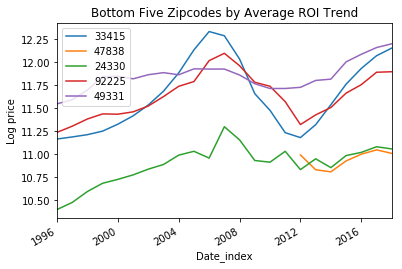

In [19]:
#dataframe for topfive zipcodes
bottomfive_yr_df = dataframe_aggregator(zillow_yr_df, bottom_100_zipcodes[:5])
np.log(bottomfive_yr_df).plot()
plt.ylabel('Log price')
plt.title('Bottom Five Zipcodes by Average ROI Trend')
plt.show()

In [20]:
# melted = pd.melt(zillow_df, id_vars=['RegionID', 'RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')

In [21]:
# hot_zips = melted.loc[melted['RegionName']==11211]
# hot_zips.plot()